In [158]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-01-14 15:34:00,423: Credentials are already in use. The existing account in the session will be replaced.


In [159]:
def createEntangled():
    es = QuantumCircuit(2)
    es.h(1)
    es.cx(1, 0)
    return es

In [160]:
def decode(de):
    de.cx(1,0)
    de.h(1)
    return de

In [161]:
def misurazioni(sdc):
    aer_sim = Aer.get_backend('aer_simulator')
    result = aer_sim.run(sdc).result()
    counts = result.get_counts(sdc)
    print(counts)
    plot_histogram(counts)

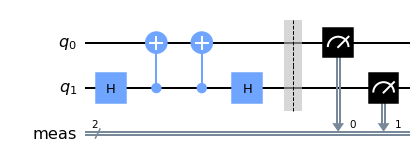

In [162]:
#Identità
sdc = createEntangled()
sdc = decode(sdc)
sdc.measure_all()
sdc.draw()

In [163]:
sdc = misurazioni(sdc)

{'00': 1024}


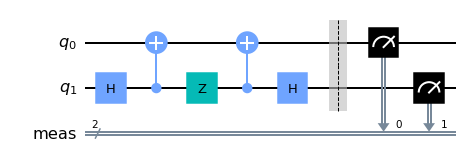

In [164]:
#Porta Z
sdc = createEntangled()
#Applico la porta Z
sdc.z(1)
sdc = decode(sdc)
sdc.measure_all()
sdc.draw()

In [165]:
sdc = misurazioni(sdc)

{'10': 1024}


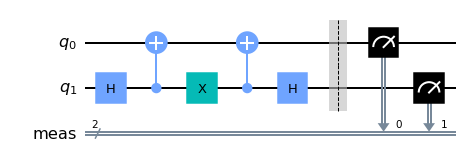

In [166]:
#Porta X
sdc = createEntangled()
#Applico la porta X
sdc.x(1)
sdc = decode(sdc)
sdc.measure_all()
sdc.draw()

In [167]:
sdc = misurazioni(sdc)

{'01': 1024}


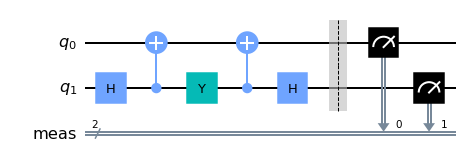

In [168]:
#Porta iY
sdc = createEntangled()
#Applico la porta iY
sdc.y(1)
sdc = decode(sdc)
sdc.measure_all()
sdc.draw()


In [169]:
sdc = misurazioni(sdc)

{'11': 1024}
